### Exercise 2: Build a linear regression model for diabete progression Problem
##### (10 points) --> your total will divided by 5 to get 5 points for this exercise.
---

Can we use the linear regression model to predict the progress diabete progression based on BMI ?

Our aim in his exercis is apply the linear regression algorithm to a real-life problem.
In particular, we seek to:
* Build linear rgression models with Cross-Validation
* Using Hyperparameter Tuning Using Grid Search Cross-Validation


** You will find the dataset (diabetes.csv) under the datasets section on Canvas **

### Step to do:

In [2]:
# import the requierd pakages:
import pandas as pd
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor, RANSACRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from numpy import absolute


%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [4]:
# Load the data with Pandas using read_csv()
# Loading the dataset using pandas
df = pd.read_csv('diabetes.csv')

In [5]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1- divide the data into features (X) and target (y) --> your target is bmi  (2 point)

In [8]:
# write your code here:

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Selecting the features and the target variable (BMI)
X = df.drop(columns=['bmi'])
y = df['bmi']

# Display the shape of the dataset to ensure the division is correct
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (768, 8)
Target (y) shape: (768,)


2- Plot scatter plot to get a better idea of the effect of each feature on the target variable BMI (2 points)

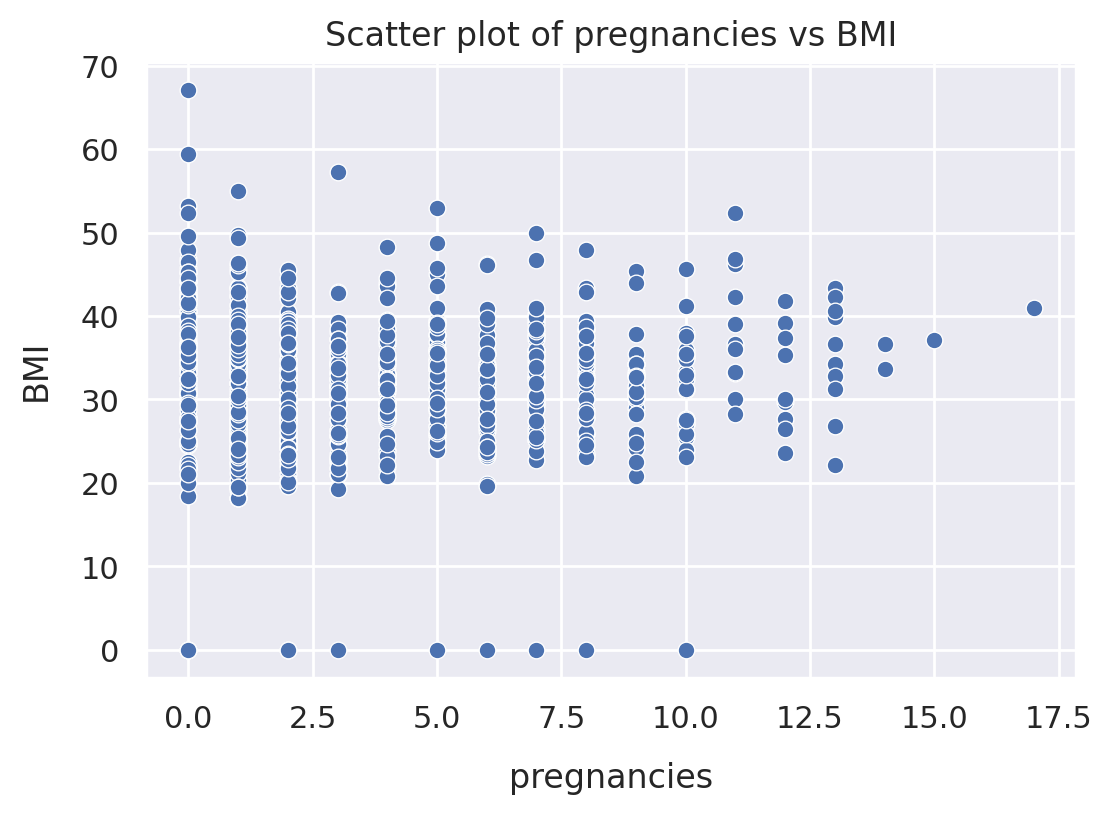

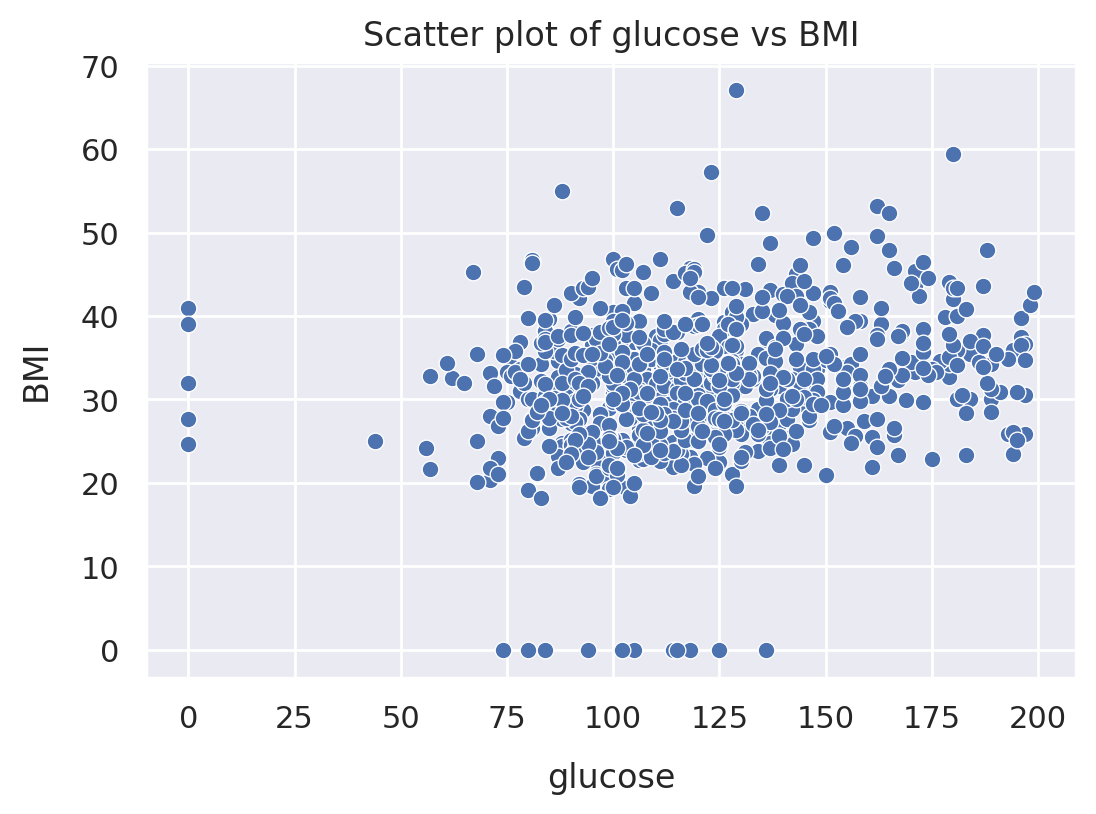

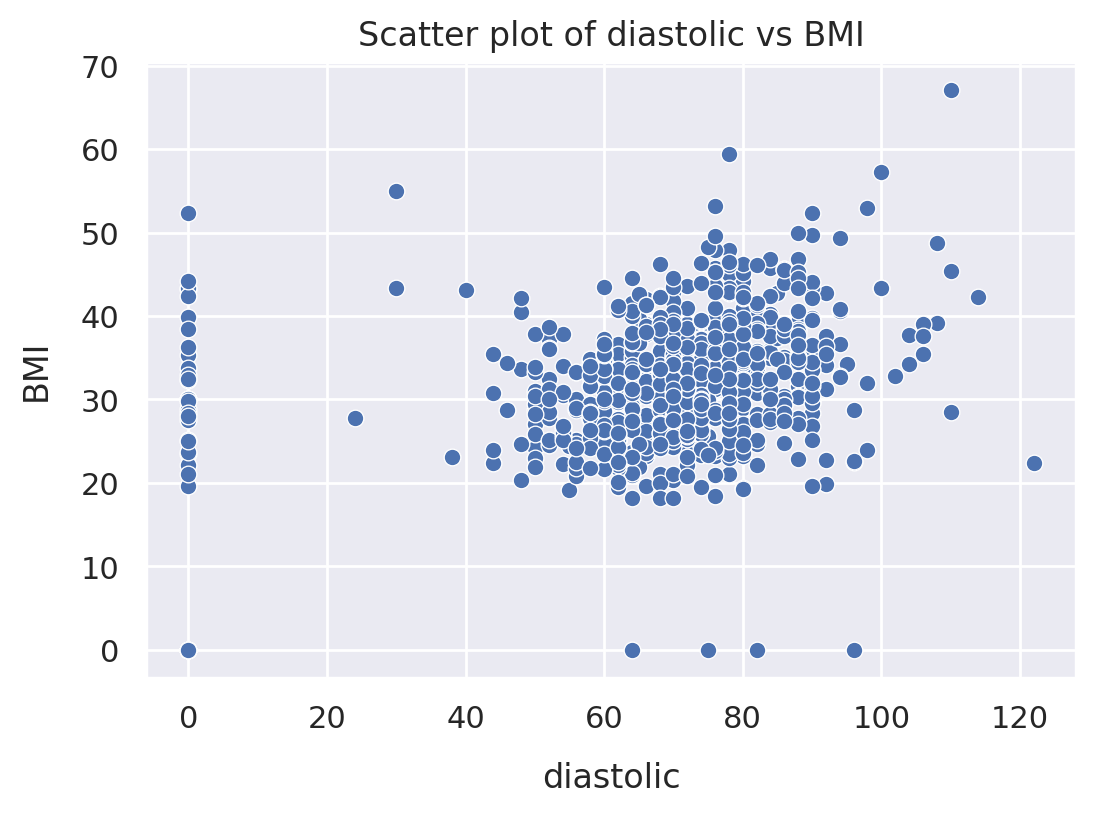

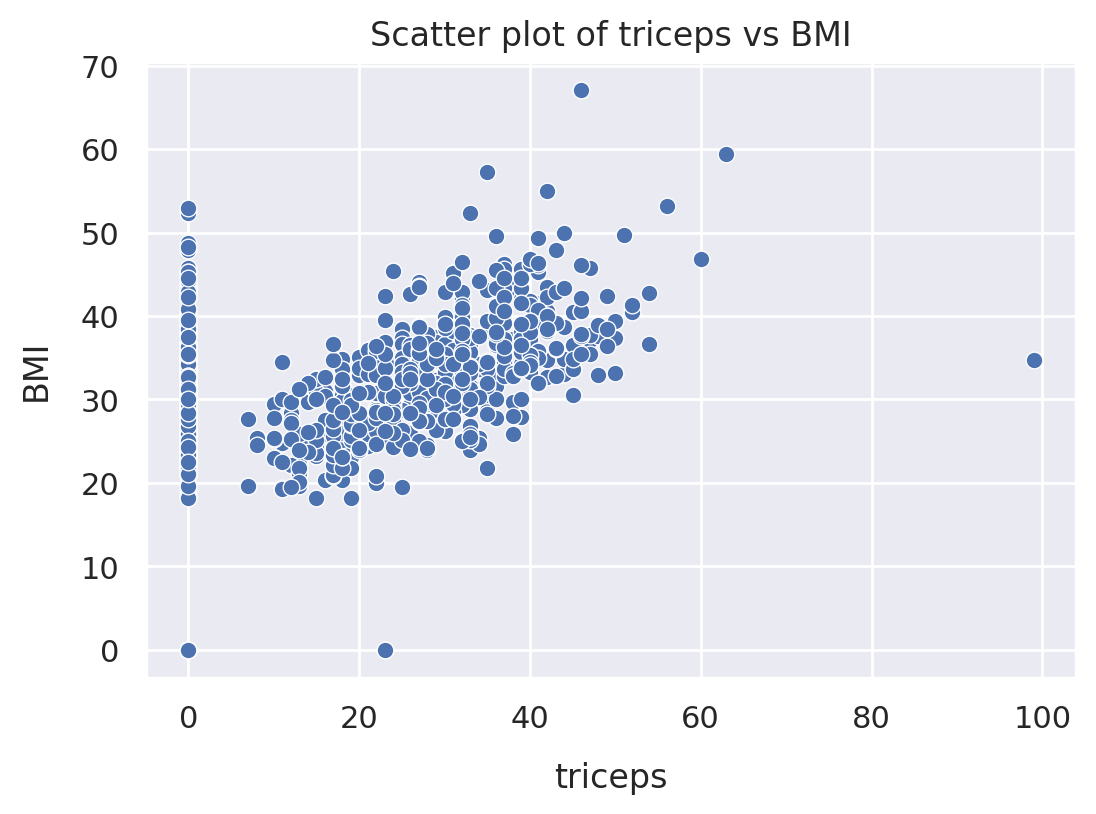

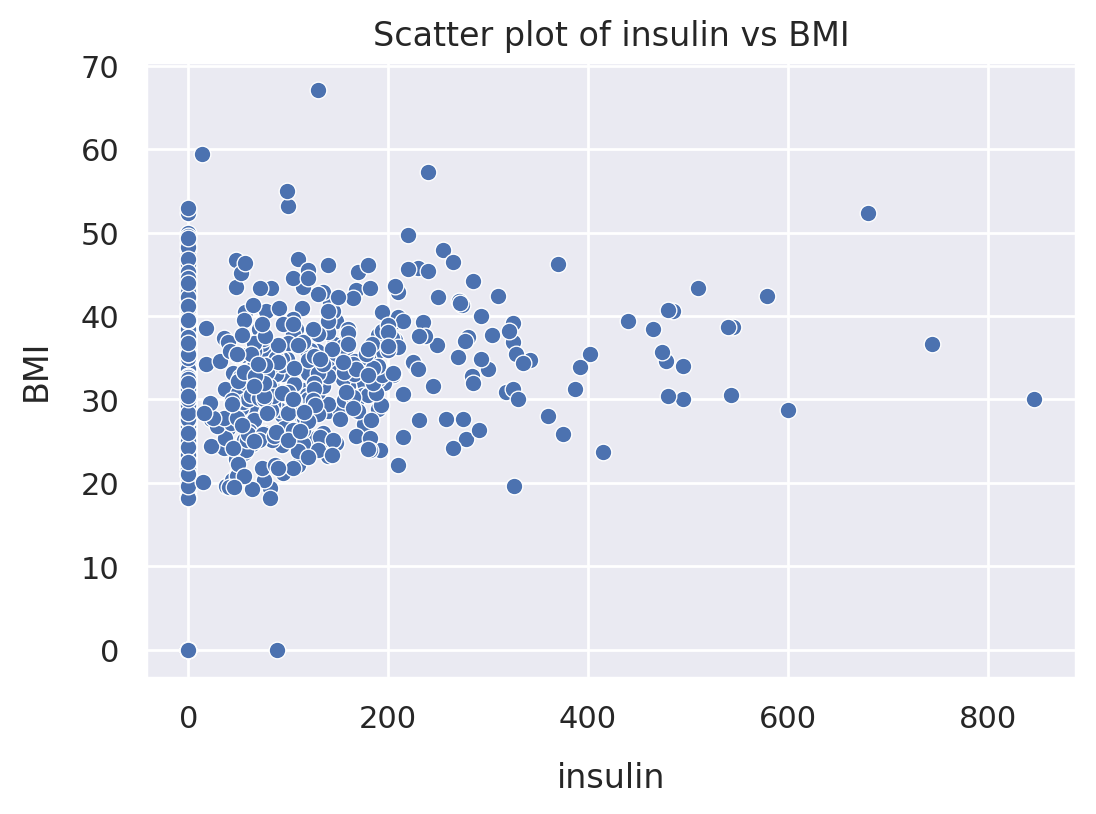

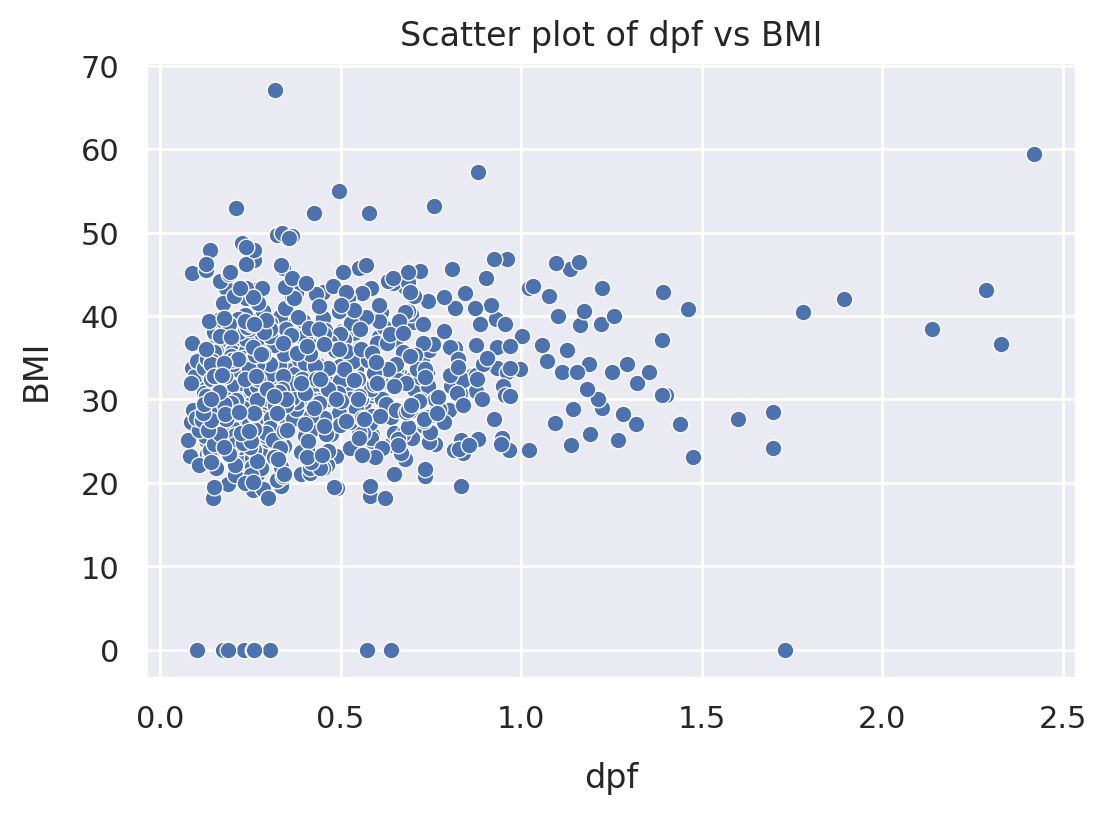

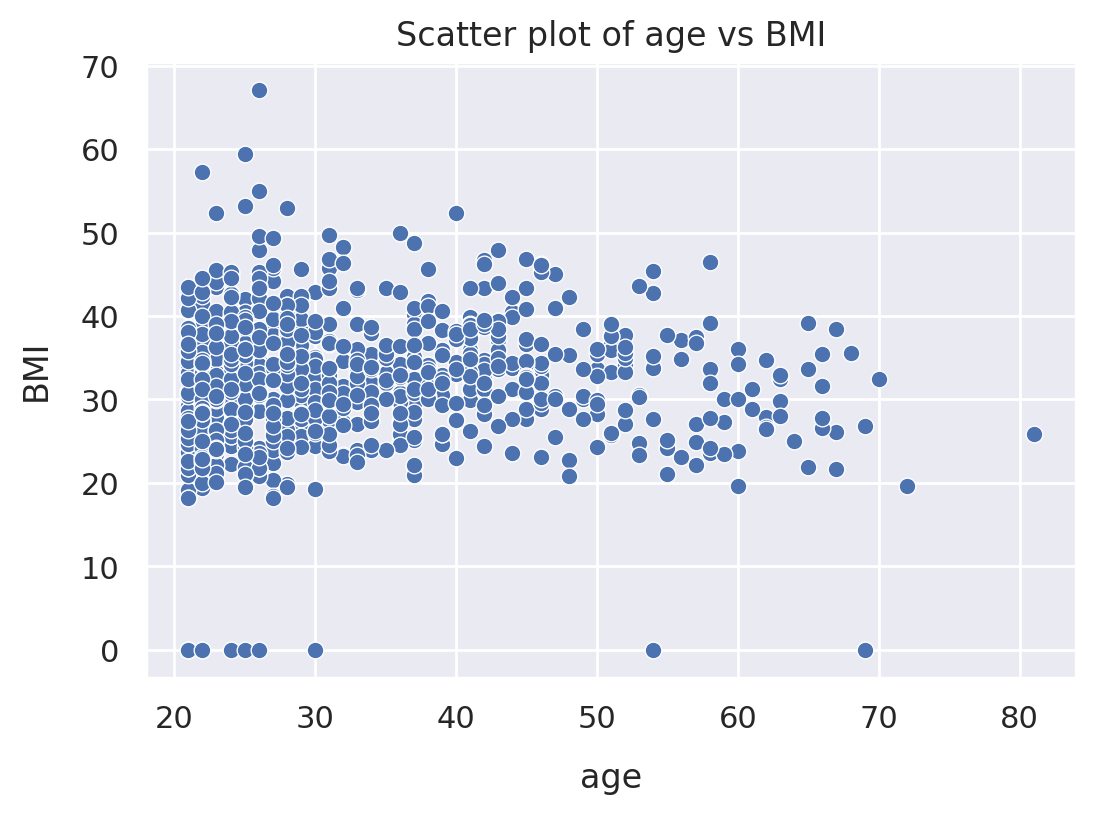

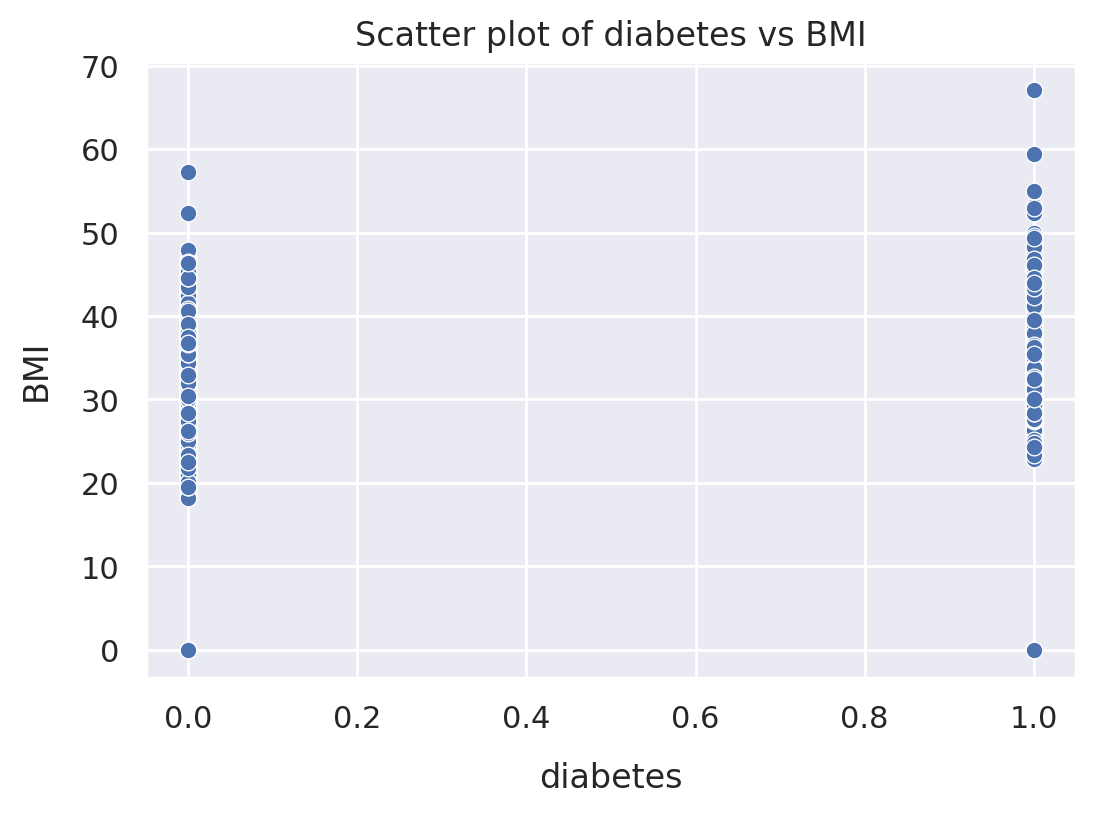

In [9]:
# write your code here:

# Plot scatter plots for each feature vs target (bmi)
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[column], y=y)
    plt.title(f'Scatter plot of {column} vs BMI')
    plt.xlabel(column)
    plt.ylabel('BMI')
    plt.show()

3- Plotting the box plot to check for outliers using boxplot (2 points)

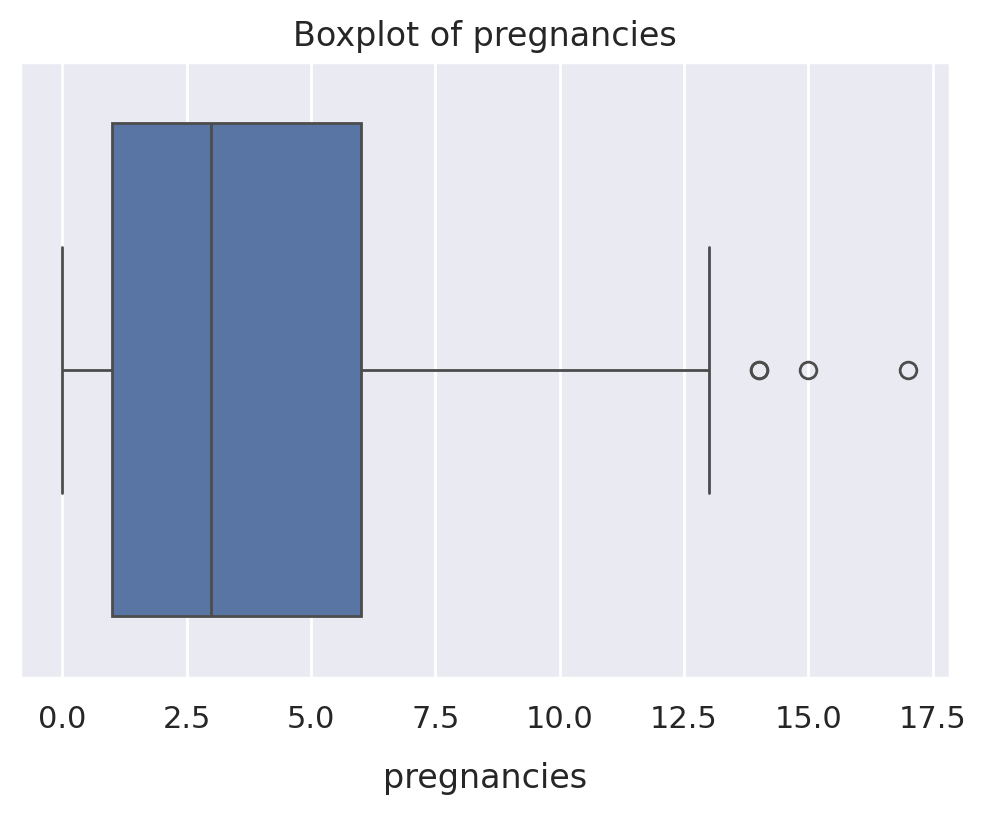

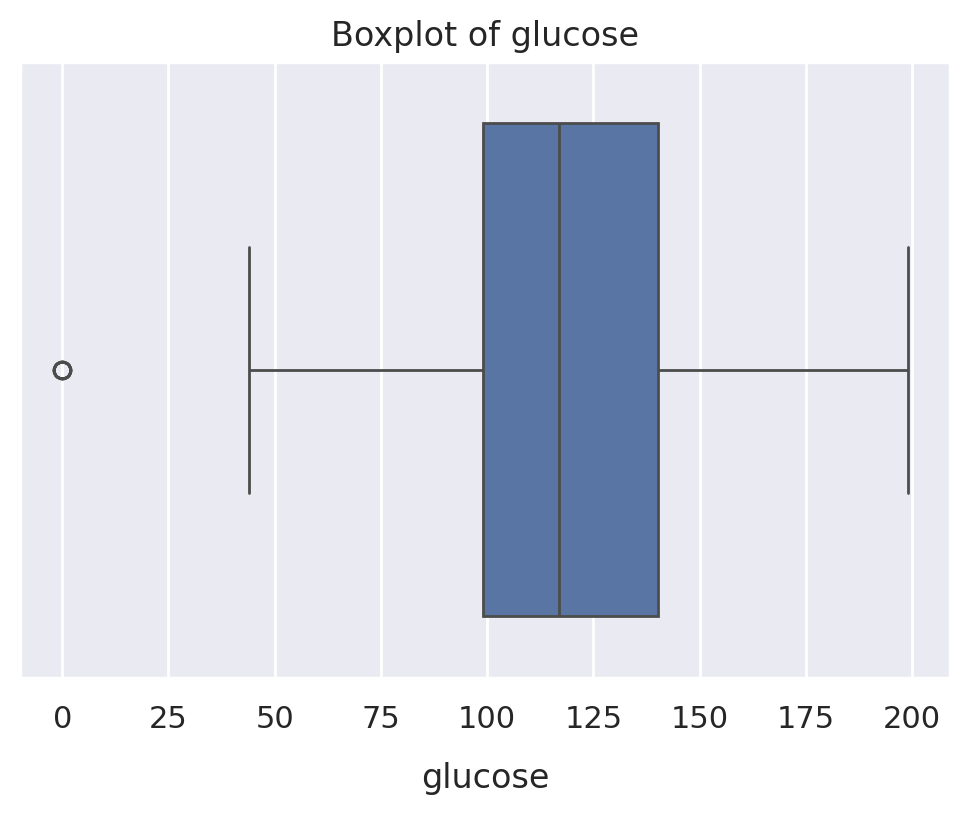

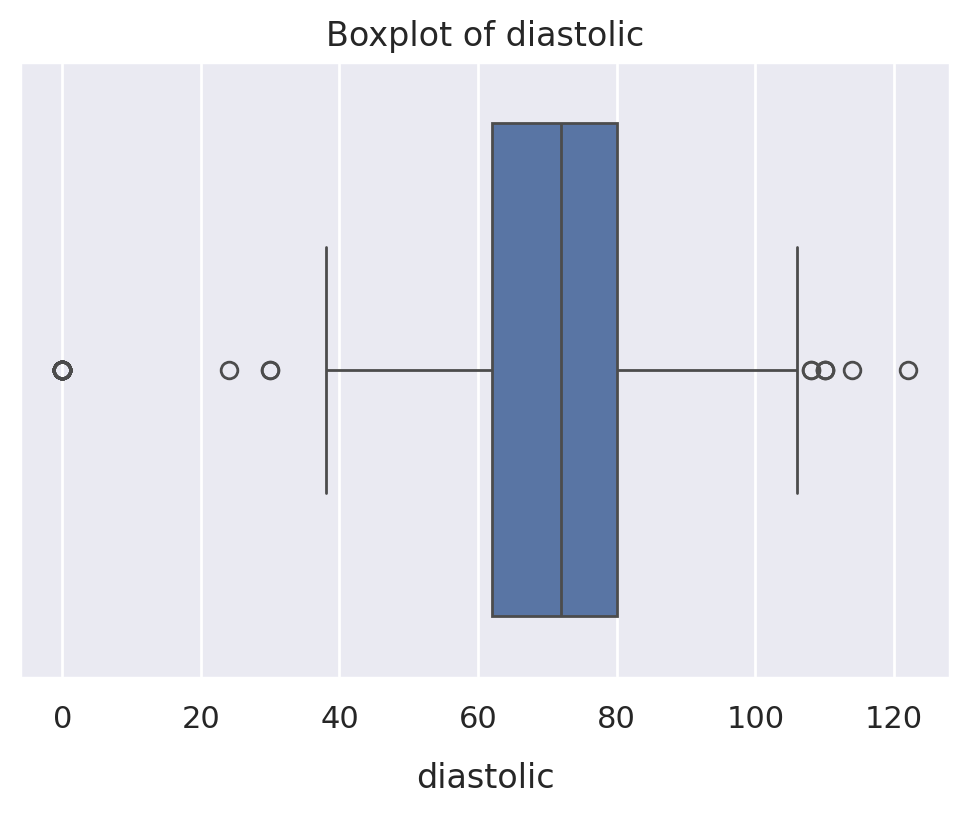

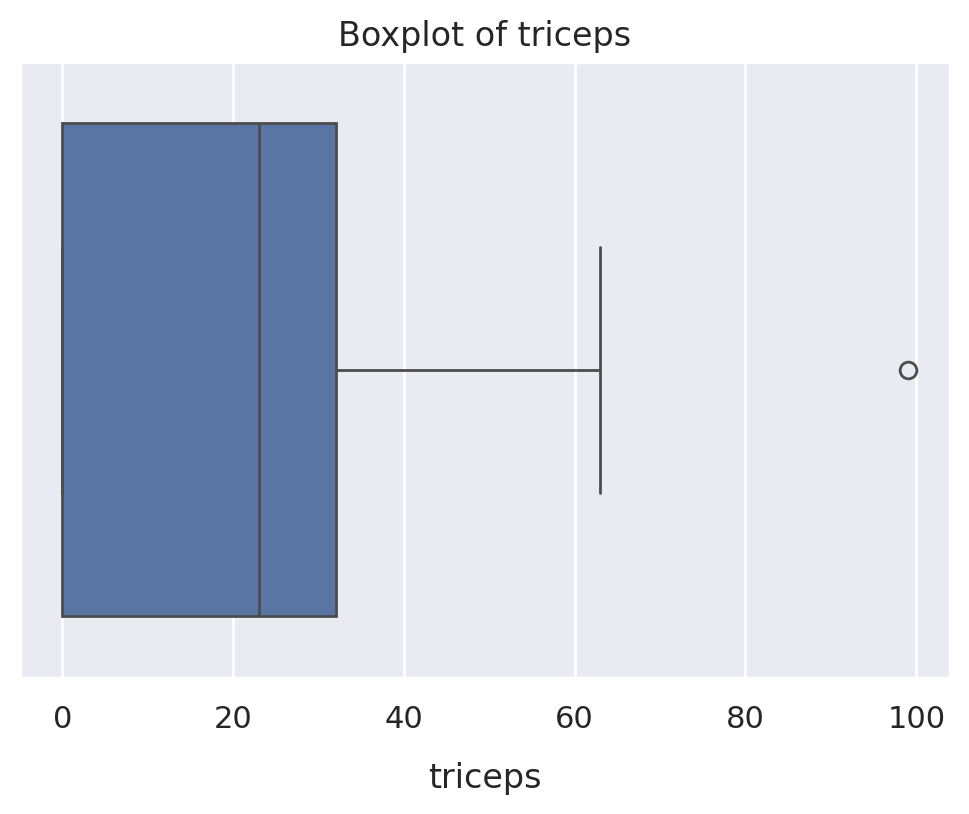

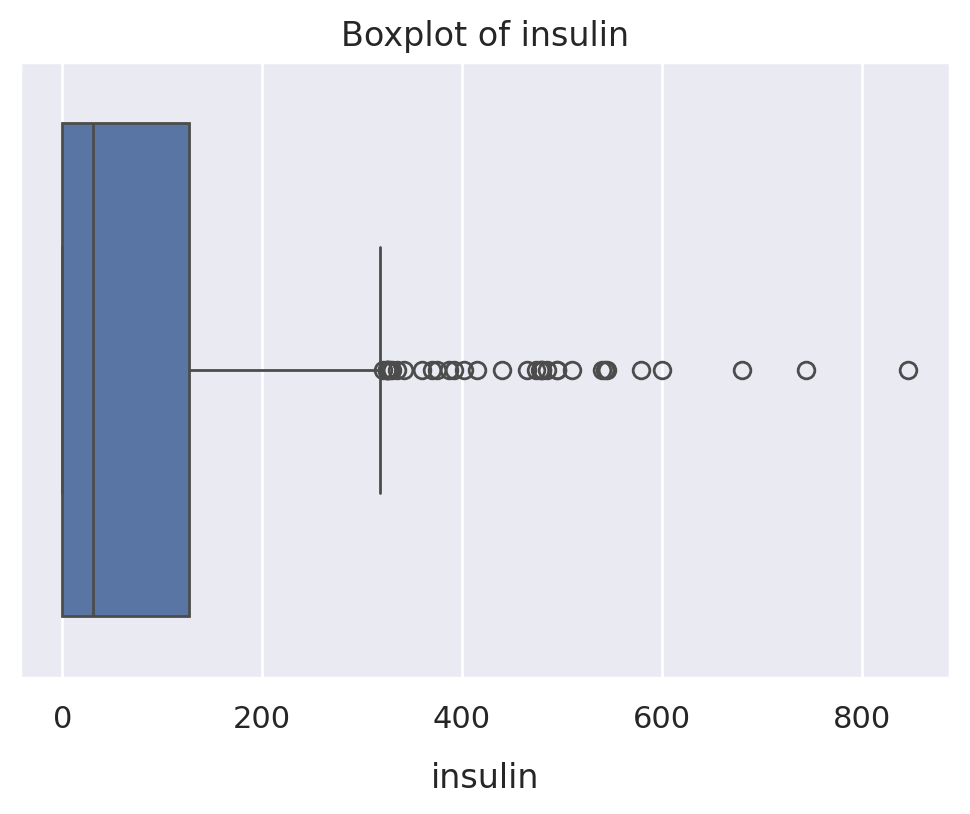

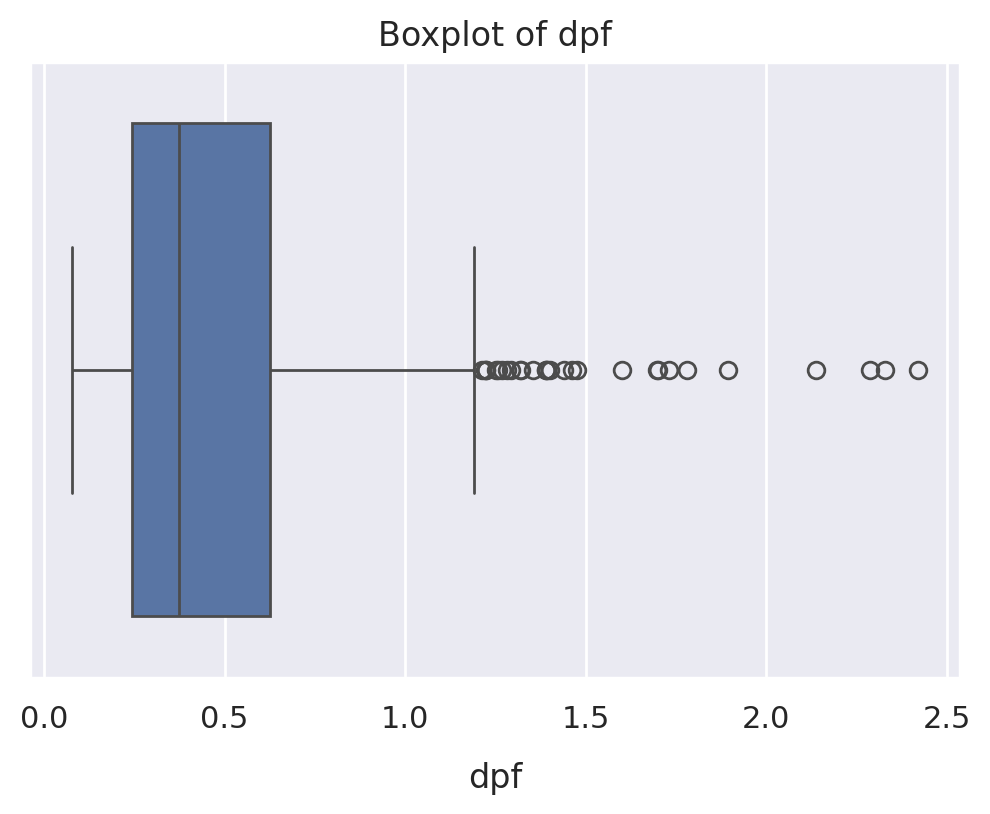

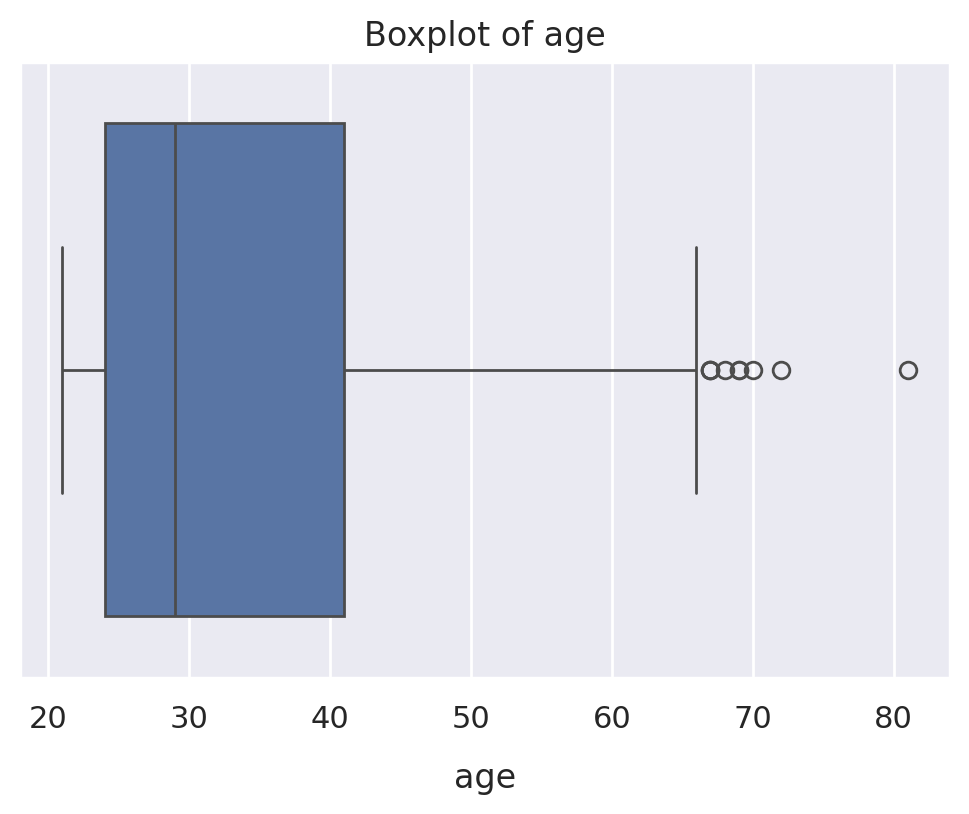

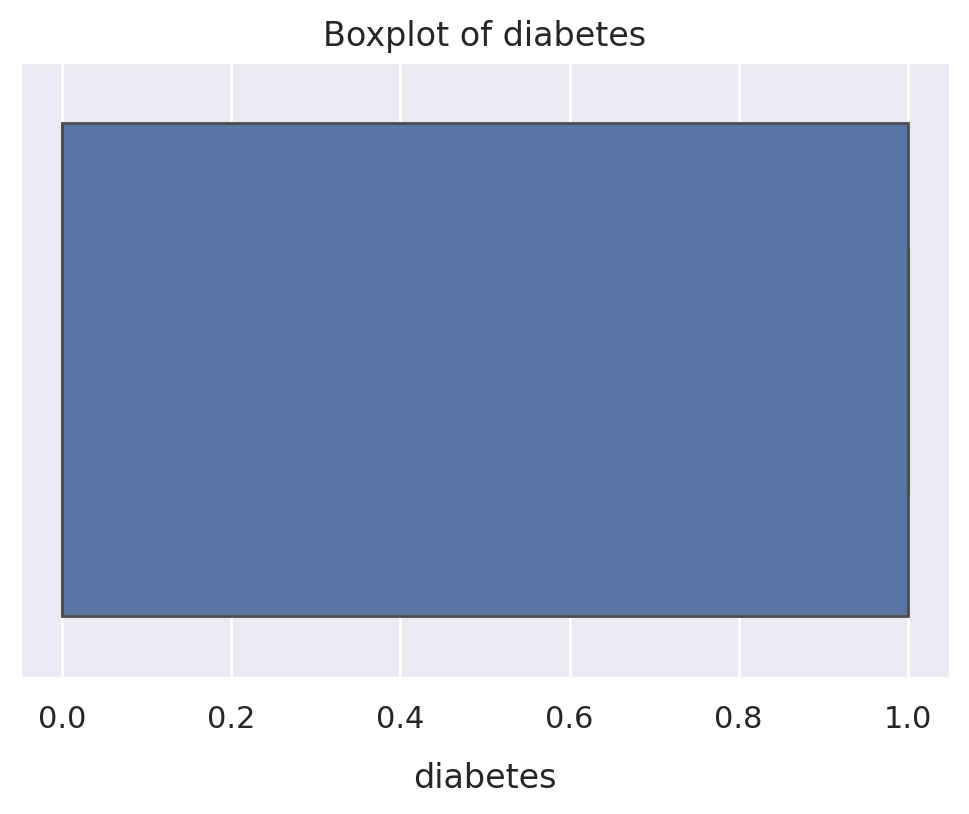

In [10]:
# write your code here:

# Plot boxplots to detect outliers in each feature
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=X[column])
    plt.title(f'Boxplot of {column}')
    plt.show()



4- Splitting the data into training and testing sets (2 points)

We train the model with 80% of the samples and test with the remaining 20%.

In [11]:
# Write your code here:

# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (614, 8) (614,)
Testing set shape: (154, 8) (154,)


5- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset, and evaluate the linear regression modle (2 points)
* Use k=5
* use MSE as your metric

Remember  : 'neg_mean_squared_error' returns the negated value of the MSE, make sure to take the absolute to get the positive one

In [12]:
# write your code here:
# Write your code here:

# Define the pipeline with StandardScaler and LinearRegression
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Perform 5-fold cross-validation using 'neg_mean_squared_error' and then take the absolute value
mse_scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mse_scores = absolute(mse_scores)

# Display the MSE scores and their mean
print("Cross-validation MSE scores:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))

Cross-validation MSE scores: [51.65265813 65.54242942 33.2725188  36.92932068 39.71015154]
Mean MSE: 45.42141571249804


In [ ]:
from google.colab import drive
drive.mount('/content/drive')